<div class="span5 alert alert-info">
<b>
<h2>    
Predictive Analysis:
</h2>    
</b>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train_join = pd.read_csv("../DataFiles/air_bnb_clean_data/air_bnb_reduced_data.csv")
df_train_join.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age_bucket', 'signup_method',
       'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'month_of_first_booking', 'Others', 'action_active',
       'action_ajax_check_dates', 'action_ajax_lwlb_contact',
       'action_ajax_photo_widget_form_iframe', 'action_ajax_refresh_subtotal',
       'action_ask_question', 'action_authenticate',
       'action_calendar_tab_inner2', 'action_campaigns', 'action_click',
       'action_collections', 'action_complete_status', 'action_confirm_email',
       'action_create', 'action_dashboard', 'action_edit',
       'action_edit_verification', 'action_header_userpic', 'action_identity',
       'action_impressions', 'action_index', 'action_listings',
       'action_lookup', 'action_manage_listing', 'action_notifications',
       'action_other_ho

In [3]:
#setting plot style
plt.style.use('ggplot')

<div class="span5 alert alert-info">
<b>    
Feature Selection
</b>    
</div>

**Feature selection based on Mutual information gain**

In [4]:
df_train_join.fillna(9999, inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [6]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [7]:
#dropping redundant columns
X = df_train_join.drop(['id','date_account_created','timestamp_first_active','date_first_booking','country_destination'],axis=1)
y = df_train_join['country_destination']

X.shape, y.shape

((213451, 75), (213451,))

In [8]:
df_train_join.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age_bucket', 'signup_method',
       'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'month_of_first_booking', 'Others', 'action_active',
       'action_ajax_check_dates', 'action_ajax_lwlb_contact',
       'action_ajax_photo_widget_form_iframe', 'action_ajax_refresh_subtotal',
       'action_ask_question', 'action_authenticate',
       'action_calendar_tab_inner2', 'action_campaigns', 'action_click',
       'action_collections', 'action_complete_status', 'action_confirm_email',
       'action_create', 'action_dashboard', 'action_edit',
       'action_edit_verification', 'action_header_userpic', 'action_identity',
       'action_impressions', 'action_index', 'action_listings',
       'action_lookup', 'action_manage_listing', 'action_notifications',
       'action_other_ho

<div class="span5 alert alert-info">
<b>
Create training and test sets
</b>
</div> 

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [10]:
X_train.shape, X_test.shape

((149415, 75), (64036, 75))

**Remove constant quasi constant**

In [11]:
constant_filter = VarianceThreshold(threshold = 0.01)
constant_filter.fit(X_train)

X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

**Removing duplicate features**

In [12]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [13]:
X_train_T = pd.DataFrame(X_train_T) 
X_test_T = pd.DataFrame(X_test_T) 

In [14]:
dupicated_features = X_train_T.duplicated()

In [15]:
print("total duplicate features",dupicated_features.sum())

total duplicate features 3


In [16]:
dup_index = [i for i, val in enumerate(dupicated_features) if val] 
print('duplicate features',X_train.columns[dup_index])

duplicate features Index(['des_lang_CA', 'des_lang_GB', 'des_lang_US'], dtype='object')


In [17]:
features_to_keep = [not index for index in dupicated_features]

In [18]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [19]:
X_train_unique.shape, X_test_unique.shape

((149415, 72), (64036, 72))

**Calculating Mutual Information gains**

In [20]:
mi = mutual_info_classif(X_train_unique, y_train)

In [21]:
len(mi)

72

In [22]:
mi #Higher the number better the mutual information.

array([0.02940315, 0.03970797, 0.00137079, 0.01364145, 0.01587859,
       0.0121094 , 0.00930244, 0.00794839, 0.01705538, 0.01193302,
       0.01340866, 0.70207736, 0.01154296, 0.01196822, 0.01780009,
       0.01297707, 0.01769413, 0.0158044 , 0.01658364, 0.00931158,
       0.01198654, 0.01525184, 0.01477085, 0.01883747, 0.02094521,
       0.00714915, 0.01390146, 0.01216736, 0.01450066, 0.01846788,
       0.01473822, 0.01741085, 0.01600073, 0.00578122, 0.01736229,
       0.0148247 , 0.01826459, 0.01492784, 0.01828319, 0.01220661,
       0.01977709, 0.01543517, 0.03128234, 0.01917992, 0.01536844,
       0.01238435, 0.00626543, 0.01653722, 0.01345459, 0.01541921,
       0.01852352, 0.01531179, 0.02175736, 0.0155486 , 0.01012497,
       0.00249209, 0.01936775, 0.01635015, 0.01848699, 0.01556555,
       0.01736951, 0.01753028, 0.03853981, 0.03950975, 0.04100487,
       0.03860583, 0.03770533, 0.03911185, 0.04273444, 0.03555048,
       0.04111717, 0.04253438])

In [23]:
mi = pd.Series(mi)
mi.index = X_train.columns[X_train_unique.columns]

In [24]:
mi.index

Index(['gender', 'age_bucket', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'month_of_first_booking', 'Others', 'action_active',
       'action_ajax_check_dates', 'action_ajax_lwlb_contact',
       'action_ajax_photo_widget_form_iframe', 'action_ajax_refresh_subtotal',
       'action_ask_question', 'action_authenticate',
       'action_calendar_tab_inner2', 'action_campaigns', 'action_click',
       'action_collections', 'action_complete_status', 'action_confirm_email',
       'action_create', 'action_dashboard', 'action_edit',
       'action_edit_verification', 'action_header_userpic', 'action_identity',
       'action_impressions', 'action_index', 'action_listings',
       'action_lookup', 'action_manage_listing', 'action_notifications',
       'action_other_hosting_reviews_first', 'action_personalize',
       'action_qt2', 'action_recommendati

In [25]:
values = mi.sort_values(ascending=True)
values

signup_method             0.001371
des_lang_AU               0.002492
action_index              0.005781
action_show               0.006265
action_confirm_email      0.007149
                            ...   
age_grp_DE                0.041005
age_grp_PT                0.041117
age_grp_US                0.042534
age_grp_IT                0.042734
month_of_first_booking    0.702077
Length: 72, dtype: float64

**Plotting features with mutual information gains for classification**

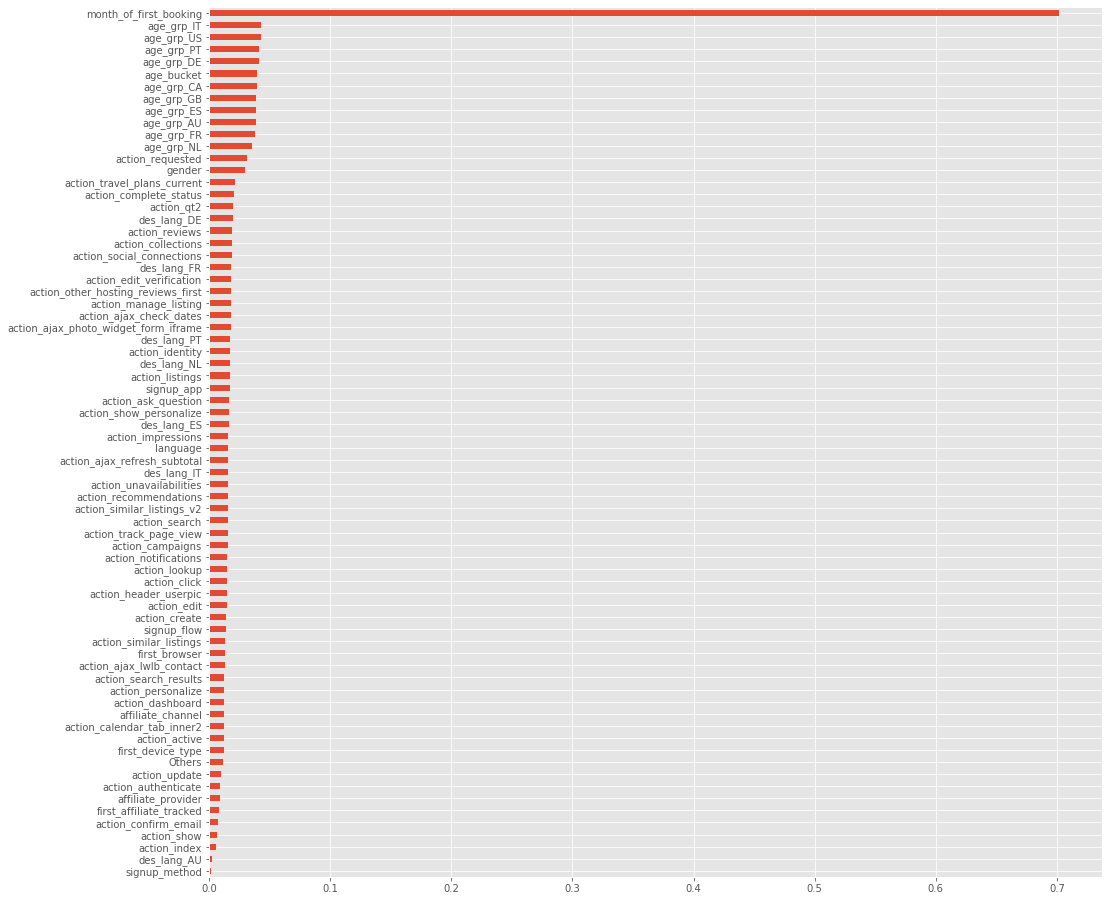

In [26]:
values.plot(kind='barh',figsize=(16,16))

**month_of_first_booking has highest mutual information for classification.**

**Selecting the best features, setting a threshold of 10 precentile**

In [27]:
sel = SelectPercentile(mutual_info_classif,percentile=10).fit(X_train_unique,y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([1, 11, 66, 67, 69, 71, 73, 74], dtype='int64')

In [28]:
len(X_train_unique.columns[sel.get_support()])

8

**Keeping only these features for further analysis**

In [30]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)

X_train_mi.shape,X_test_mi.shape

((149415, 8), (64036, 8))

****

<div class="span5 alert alert-info">
<b>
Predictive model and performance
</b>
</div>

In [31]:
X_train = X_train_mi #Renaming
X_test = X_test_mi

<div class="span5 alert alert-info">
<b>
RandomForest Classifier
</b>
</div>

In [32]:
clf = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=1)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
y_pred = clf.predict(X_test)

In [34]:
print("accuracy_score",accuracy_score(y_test,y_pred))

accuracy_score 0.8756480729589606


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       162
           1       0.00      0.00      0.00       428
           2       0.00      0.00      0.00       318
           3       0.00      0.00      0.00       675
           4       0.00      0.00      0.00      1507
           5       0.00      0.00      0.00       697
           6       0.00      0.00      0.00       851
           7       1.00      1.00      1.00     37363
           8       0.00      0.00      0.00       229
           9       0.00      0.00      0.00        65
          10       0.70      1.00      0.82     18713
          11       0.00      0.00      0.00      3028

    accuracy                           0.88     64036
   macro avg       0.14      0.17      0.15     64036
weighted avg       0.79      0.88      0.82     64036



/Users/Anand/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
def plotComparison(y_test,pred):
    plt.figure(figsize=(18,8))
    plt.subplot(1, 2, 1)
    cat_counts = y_test.value_counts()
    cat_counts.plot.bar()
    plt.xlabel("test destination countries")
    
    plt.subplot(1, 2, 2)
    cat_counts = pd.Series(pred).value_counts()
    cat_counts.plot.bar()
    plt.xlabel("predicted destination countries")

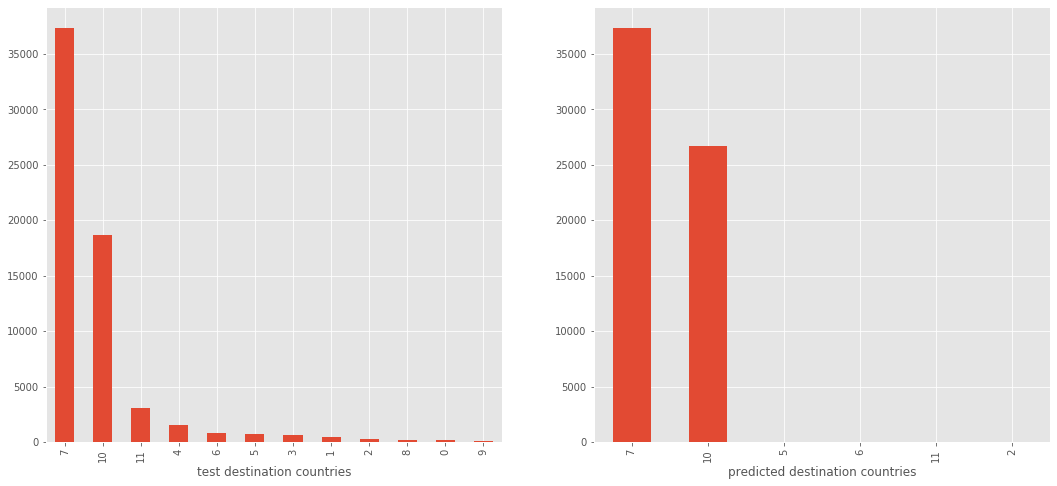

In [38]:
plotComparison(y_test,y_pred)

**From the above plot we see that two major class 7 and 10 are classified with accuracy of 0.875**

<div class="span5 alert alert-info">
<b>
Hyper parameter tuning
</b>
</div>

<div class="span5 alert alert-info">
<b>
RandomSearchCV
</b>
</div>

In [38]:
print(clf.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [39]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [40]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [41]:
print(rf_random.best_params_)

{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}


In [42]:
best_random = rf_random.best_estimator_

In [43]:
best_random.fit(X_train,y_train)
y_pred = best_random.predict(X_test)

print("accuracy_score",accuracy_score(y_test,y_pred))

accuracy_score 0.8756949216065963


**Hyperparameter tunning gives accuracy score of 0.875**

****

<div class="span5 alert alert-info">
<b>
Neural Networks
</b>
</div>

In [39]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

Using TensorFlow backend.
/Users/Anand/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Anand/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Anand/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Anand/anaconda3/lib/python3.7/site-packages/tenso

**Base model using SGD optimiser**

In [40]:
# Convert the target to categorical: target
target_class = 12 #total class categories to predict

#Setting predictors and target
target = to_categorical(y_train)
predictors = X_train

#input nodes based on number of features
n_cols = predictors.shape[1]

In [41]:
#Set up the model
model_bSGD = Sequential() #base model using SGD optimiser

# Add the first layer
model_bSGD.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model_bSGD.add(Dense(target_class, activation='softmax'))

# Compile the model
model_bSGD.compile(optimizer='SGD', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

# Fit the model
model_bSGD.fit(predictors, target, epochs = 5)


Epoch 1/5
149415/149415 [==============================] - 8s 56us/step - loss: 4454283.2270 - accuracy: 0.5831
Epoch 2/5
149415/149415 [==============================] - 8s 56us/step - loss: 1.1734 - accuracy: 0.5835
Epoch 3/5
149415/149415 [==============================] - 10s 64us/step - loss: 1.1679 - accuracy: 0.5835
Epoch 4/5
149415/149415 [==============================] - 9s 63us/step - loss: 1.1659 - accuracy: 0.5835
Epoch 5/5
149415/149415 [==============================] - 8s 53us/step - loss: 1.1650 - accuracy: 0.5835


In [122]:
#Calculate predictions: predictions
predictions = model_bSGD.predict_classes(X_test)

pd.Series(predictions).value_counts()#predicted classes and counts

7     37363
10    26673
dtype: int64

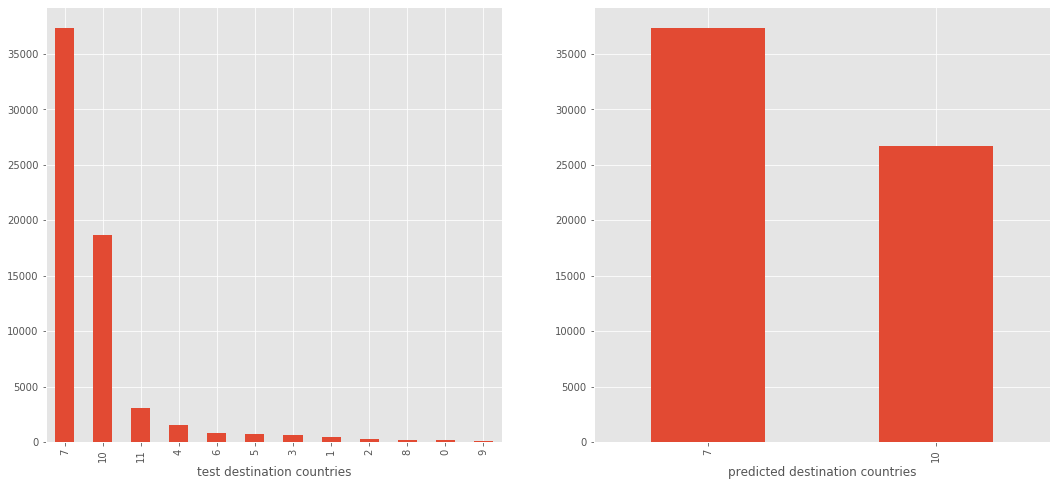

In [124]:
plotComparison(y_test,predictions)

**From the above plot, we see the model with SGD optimiser predicts two major classes 7(NDF) and class 10(US) of all the class with an accuracy = 0.875**

****

**Base model using ADAM optimiser**

In [125]:
#Set up the model
model_bAdam = Sequential() #base model using Adam optimiser

# Add the first layer
model_bAdam.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model_bAdam.add(Dense(target_class, activation='softmax'))

# Compile the model
model_bAdam.compile(optimizer='Adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

# Fit the model
model_bAdam.fit(predictors, target, epochs = 5)

Epoch 1/5
149415/149415 [==============================] - 12s 82us/step - loss: 27.4378 - accuracy: 0.7937
Epoch 2/5
149415/149415 [==============================] - 12s 79us/step - loss: 10.0158 - accuracy: 0.7979
Epoch 3/5
149415/149415 [==============================] - 12s 79us/step - loss: 6.6331 - accuracy: 0.7985
Epoch 4/5
149415/149415 [==============================] - 12s 80us/step - loss: 4.0686 - accuracy: 0.7999
Epoch 5/5
149415/149415 [==============================] - 12s 81us/step - loss: 2.1037 - accuracy: 0.8060


In [126]:
#Calculate predictions: predictions
predictions = model_bAdam.predict_classes(X_test)

pd.Series(predictions).value_counts()

7     37363
10    24508
5      1755
0       323
11       49
4        38
dtype: int64

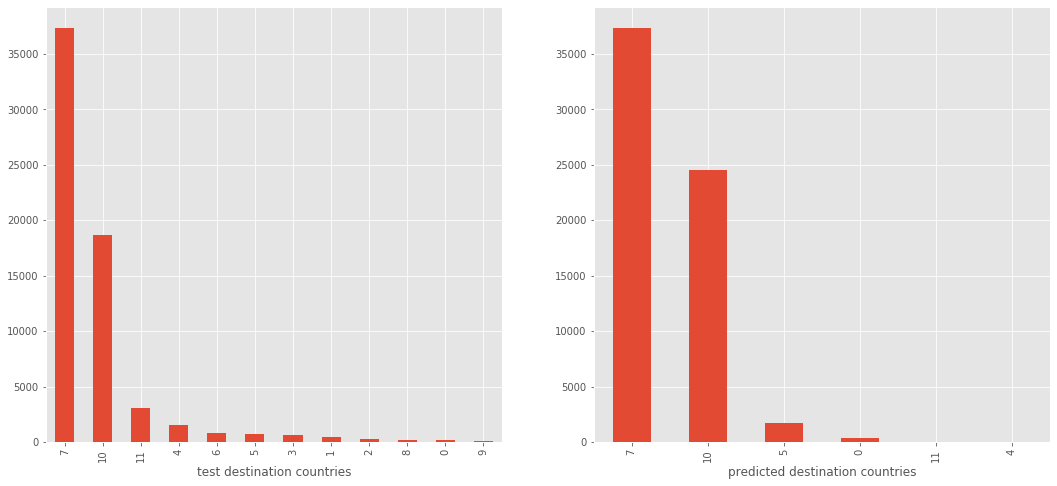

In [127]:
plotComparison(y_test,predictions)

**From the above plot see the model with Adam optimiser predicts just two major class 7(NDF), 10(US) and some rare classes with an accuracy = 0.806**

**Parameter optimisation on Learning rate, epoch, nodes, layers, EarlyStopping and Cross validation**

In [128]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

early_stopping_monitor = EarlyStopping(patience=2)

my_opt = Adam(learning_rate=0.0001)

model_ = Sequential()

model_.add(Dense(140, activation='relu', input_shape=(n_cols,)))
model_.add(Dense(100, activation='relu'))

model_.add(Dense(target_class, activation='softmax'))

model_.compile(optimizer = my_opt, loss='categorical_crossentropy',metrics=['accuracy'])

model_.fit(predictors, target, epochs=30, validation_split=0.3,callbacks=[early_stopping_monitor])

Train on 104590 samples, validate on 44825 samples
Epoch 1/30
104590/104590 [==============================] - 17s 160us/step - loss: 17.0110 - accuracy: 0.7932 - val_loss: 2.7912 - val_accuracy: 0.8703
Epoch 2/30
104590/104590 [==============================] - 18s 169us/step - loss: 2.8348 - accuracy: 0.8017 - val_loss: 1.9700 - val_accuracy: 0.8565
Epoch 3/30
104590/104590 [==============================] - 15s 145us/step - loss: 2.7735 - accuracy: 0.8015 - val_loss: 2.3644 - val_accuracy: 0.6108
Epoch 4/30
104590/104590 [==============================] - 16s 148us/step - loss: 2.5553 - accuracy: 0.8023 - val_loss: 1.8364 - val_accuracy: 0.8454
Epoch 5/30
104590/104590 [==============================] - 15s 147us/step - loss: 2.5068 - accuracy: 0.8041 - val_loss: 1.9401 - val_accuracy: 0.8128
Epoch 6/30
104590/104590 [==============================] - 15s 146us/step - loss: 2.3896 - accuracy: 0.8046 - val_loss: 1.8093 - val_accuracy: 0.8766
Epoch 7/30
104590/104590 [================

In [129]:
#Calculate predictions: predictions
predictions = model_.predict_classes(X_test) #predicting classes

pd.Series(predictions).value_counts()

7     37363
10    25103
0      1557
11       11
5         1
3         1
dtype: int64

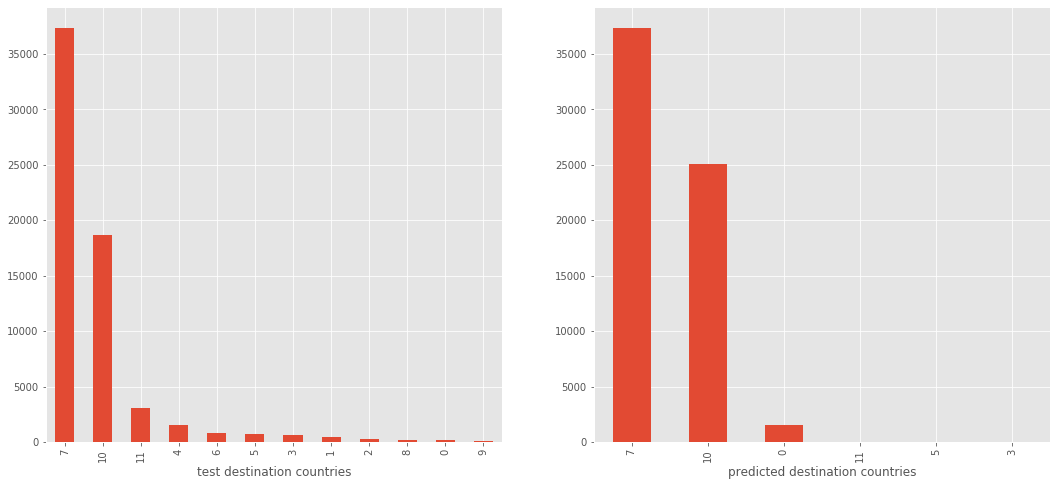

In [130]:
plotComparison(y_test,predictions)

**From the above plot see the model with Adam optimiser and parameter tuning predicts some of the rare classes with validation accuracy = 0.859**

<div class="span5 alert alert-info">
<b>
Consolidating the Results:
</b>
</div>

**1. month_of_first_booking was the most imporant feature.**

**2. Randomforest Classifier gives accuracy score of 0.875 ,predicting mostly the major classes.**

**3. Neural network Classifier with Adam optimiser and parameter tuning predicts some of the rare classes with validation accuracy of 0.8622**